In [37]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline
from math import factorial

11482


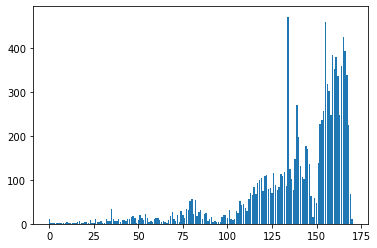

In [38]:
df_to = pd.read_excel('to_cleft_all.xlsx')
hits_to = df_to["Reference"]
hits_to = list(hits_to)
#print(refs)
splall = []

for i in hits_to:
    splall.append(i.split(","))
#print(splall)
years_to = []

for i in splall:
    years_to.append(i[1])
    
print(len(years_to))

vocab_to = set(years_to)

counts_to = dict()
counts_to = Counter(years_to)

counts_s_to = dict(sorted(counts_to.items()))
#print(counts_s_to)
counts_s_to.pop(' Анна Київська')
counts_s_to = {int(k):int(v) for k,v in counts_s_to.items()}

graph_to = plt.bar(range(len(counts_s_to)), list(counts_s_to.values()), align='center')

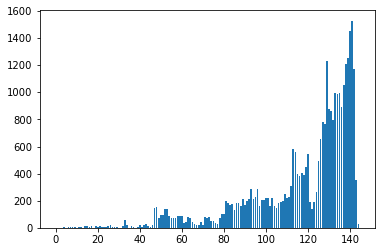

In [39]:
df_tse = pd.read_excel('tse_cleft_all.xlsx')
hits_tse = df_tse["Reference"]
hits_tse = list(hits_tse)
#print(refs)
splall = []

for i in hits_tse:
    splall.append(i.split(","))
#print(splall)
years_tse = []

for i in splall:
    years_tse.append(i[1])
    
#print(len(years_tse))

vocab_tse = set(years_tse)

counts_tse = dict()
counts_tse = Counter(years_tse)

counts_s_tse = dict(sorted(counts_tse.items()))
counts_s_tse.pop(' Анна Київська')
counts_s_tse = {int(k):int(v) for k,v in counts_s_tse.items()}
#print(counts_s_tse)

graph_tse = plt.bar(range(len(counts_s_tse)), list(counts_s_tse.values()), align='center')
plt.show()

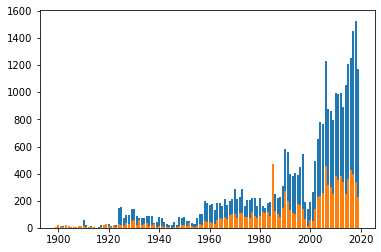

In [40]:
year_list = [*range(1816, 2020)]
year_dict_tse = {}
year_dict_to = {}
for i in year_list:
    year_dict_tse[i]=0
    year_dict_to[i]=0

for i in counts_s_tse.keys():
    if i in year_dict_tse.keys():
        year_dict_tse[i] = counts_s_tse[i]
        
for i in counts_s_to.keys():
    if i in year_dict_to.keys():
        year_dict_to[i] = counts_s_to[i]

xx_tse = dict(list(year_dict_tse.items())[83:])
xx_to = dict(list(year_dict_to.items())[83:])

graph_tse = plt.bar((xx_tse.keys()), (xx_tse.values()), align='center',label='ce')
graph_to = plt.bar((xx_to.keys()), (xx_to.values()), align='center', label='to')
#graph_tse.legend(framealpha=1, frameon=True)

#print(xx_tse)
#print(xx_to)

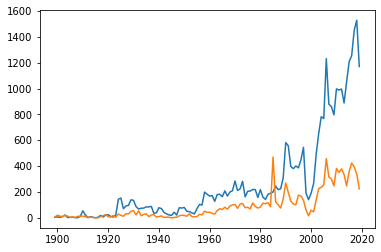

In [44]:
ce_plot = xx_tse.items()
x,y = zip(*ce_plot)
plt.plot(x,y)
to_plot = xx_to.items()
a,b = zip(*to_plot)
plt.plot(a,b)

<AxesSubplot:>

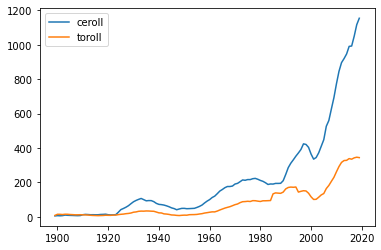

In [62]:
ceto_df = pd.DataFrame({'ce':pd.Series(xx_tse),'to':pd.Series(xx_to)})


ceto_df['ceroll'] = ceto_df.ce.rolling(10, min_periods=1).mean()
ceto_df['toroll'] = ceto_df.to.rolling(10, min_periods=1).mean()
ceto_df[['ceroll', 'toroll']].plot()